* ### Homophily is the tendency in social groups of similar people connected together. 
#### Like Attracts Like

* ### Social Influence - It is the tendency in which people change their attitude or behavior to meet the social environment by getting influenced by other people 
* ### Social Influence makes connected nodes similar.
#### For example - When A and B are already friends and A influences B to do something

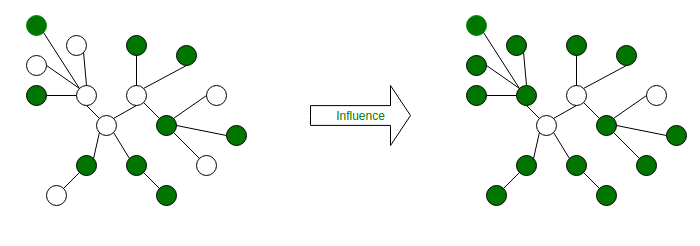

* ### Selection - It is the tendency in which people make friends with similar interests i.e people select other people having similar habits or interests.
* ### In selection, people select similar nodes and connects with them.
#### For example - When A and B are unknown but they are so alike that they select eachother as friends.

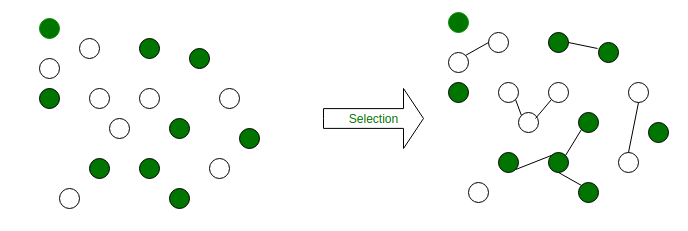

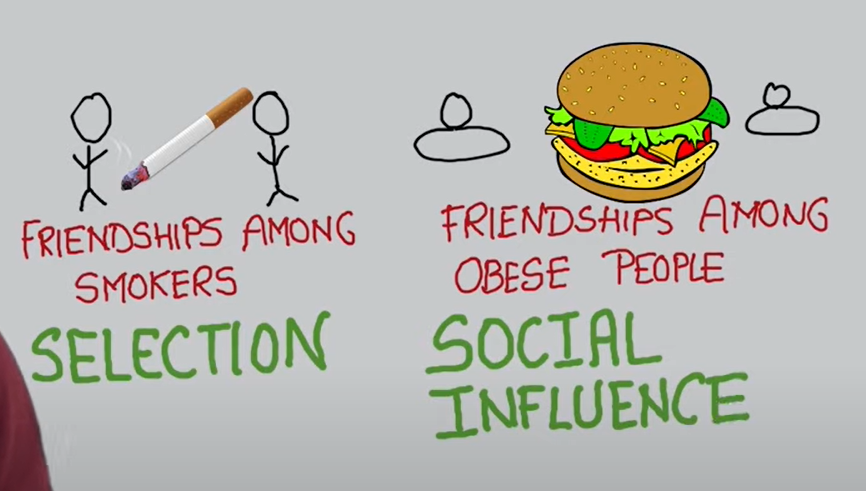

* ### Similarity Measure - 
#### For example - There are two persons A and B who like food (x,y,z) and (x,m,n,o,z).  
#### Their similarity measure = (no of foods they both like) / (total no of unique foods they like) = 2/6 

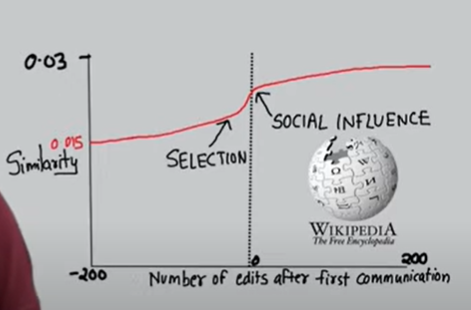

* ### Value= 1 - ( number of actual links between communities )/( number of expected links between communities )


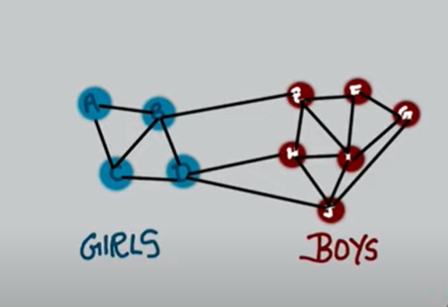

* ### Number of actual links between girls and boys = 3
* ### Number of expected links between girls and boys = 18/2 = 9
* ### 1 - (actual/expected) = 1- 3/9 = 6/9

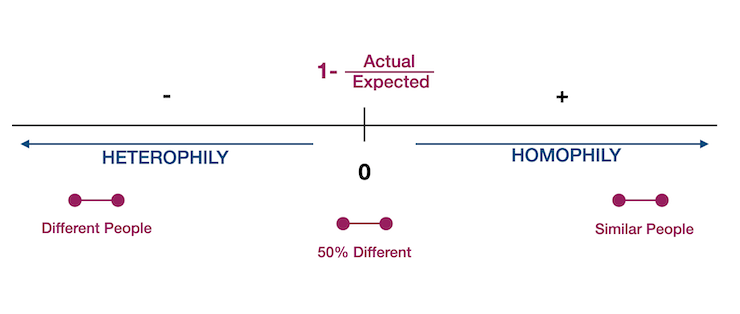

* ### More homophily means more links between similar people
* ### More heterophily means more links between dissimilar people 

* ### Triadic Closure - If two people in a social network have a friend in common, then there is an increased probability that they will become friends at some point in the future.
* ### Membership Closure - If A and B are in the same club then there is a tendency that they will become friends.
* ### Foci closure- It is the probability of becoming friends when they have the same foci.

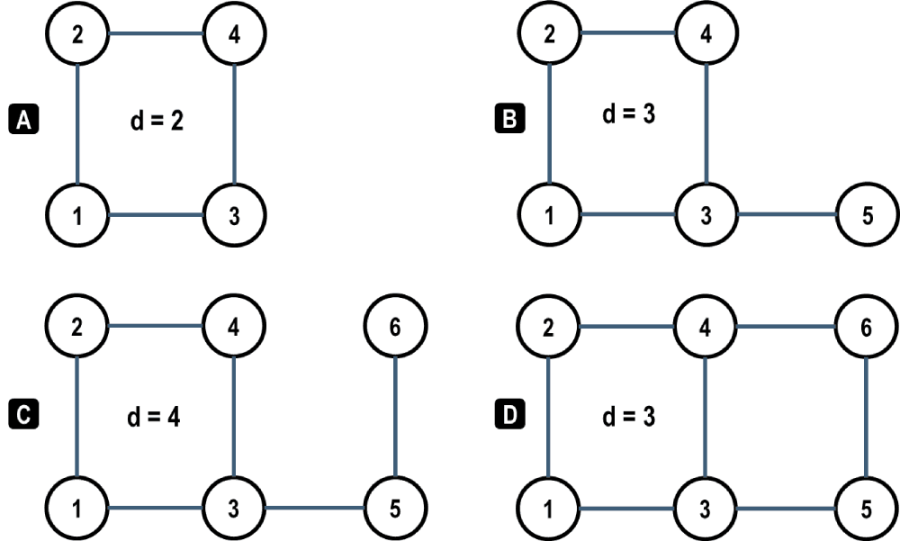

## Fatman evolutionary model
### According to Fatman Hypothesis, beware of fat friends, if your friend is fat then the probability of you gaining the weight becomes high.
* ### Homophily- People who are similar to each other, they tend to make friends with each other.
* ### Social Influence- People change their behavior and properties because of social influence.
* ### Closure-  There are 3 main kinds of closures i.e triadic closure, membership closure, and foci closure.

* ### Let B and C have a common friend A. It forms a triadic closure. If B and C have more than 1 common friend the quantity of the effect of their triadic closure also increases.
* ### Let B and C have k common friends. So the effect of triadic closure increases with the value of k.


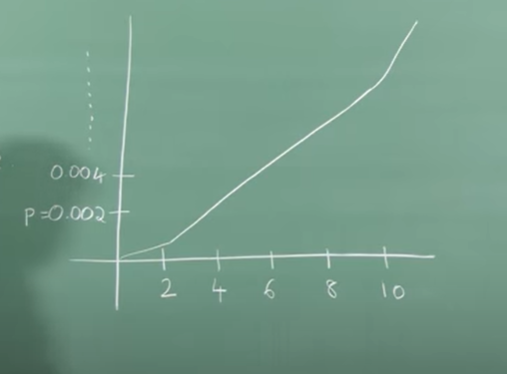

### Here -
* ### X-axis represents the value of k ( number of common friends of B and C )
* ### Y-axis represents the probability between B and C to be friends.

### Let p be the probability of B and C becoming friends when they have a common friend.
* ### (1-p) is the probability of B and C not becoming friends when they have a common friend. 
### Let the number of common friends is k 
* ### (1-p)^k is the probability of B and C not becoming friends when they have k common friends.

* ### 1-(1-p)^k is the probability of B and C becoming friends when they have k common friends

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
import time

Original network


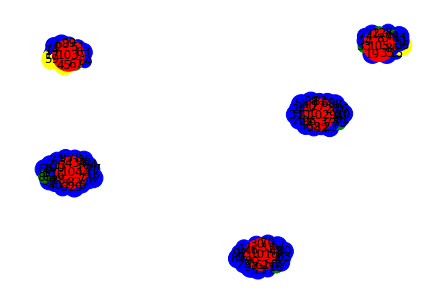

Figure  1


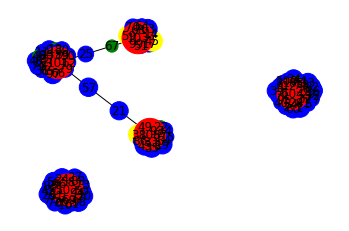

Figure  2


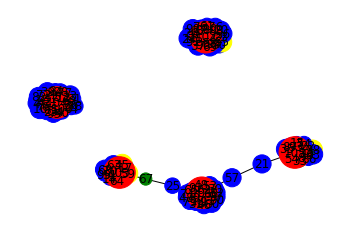

Figure  3


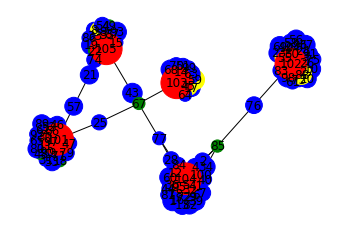

Figure  4


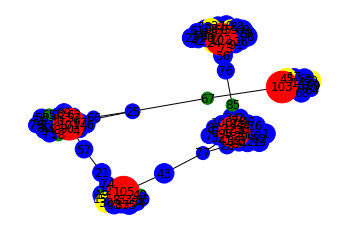

Figure  5


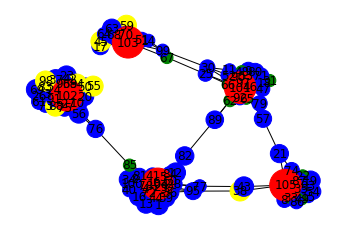

Figure  6


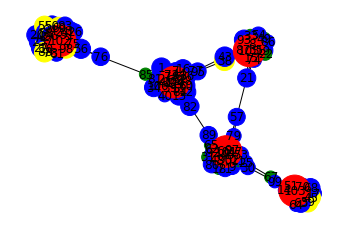

Figure  7


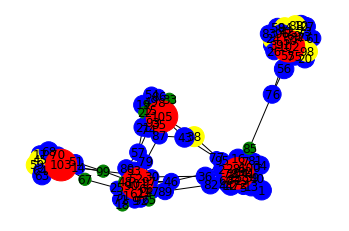

Figure  8


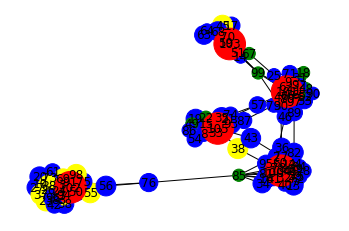

Figure  9


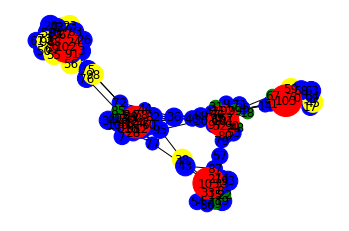

Figure  10


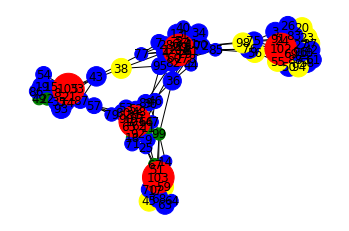

In [25]:
# Creates the graph with 100 persons named 1,2,3,...100
def create_graph():
  G= nx.Graph()
  for i in range(1,101):
    G.add_node(i)
  return G

# Visualizees the graph with labels and colors
def visualize(G,t):
  time.sleep(1)
  labeldict= get_labels(G)
  nodesize= get_size(G)
  color_array= get_colors(G)

  nx.draw(G, labels= labeldict, node_size=nodesize, node_color=color_array)
  
  plt.show()
  plt.savefig('last.jpg')
  plt.clf()
  plt.cla()
  nx.write_gml(G,'evolution_'+str(t)+'.gml')

# Assigns the body-mass-index to each person. Underweight= 15 , Overweight= 40
def assign_bmi(G):
  for each in G.nodes():
    G.nodes[each]['name']= random.randint(15,40)
    G.nodes[each]['type']= 'person'

# Gets the bmi value of each person stored in dictionary as values.
def get_labels(G):
  dict1= {}
  for each in G.nodes():
    dict1[each]= G.nodes[each]['name']

# Assigns different sizes to different person with different bmi
def get_size(G):
  array1= []
  for each in G.nodes():
    if G.nodes[each]['type']=='person':
      array1.append(G.nodes[each]['name']*10)
    else:
      array1.append(1000)
  return array1

# Adds 5 foci nodes
def add_foci_nodes(G):
  n= G.number_of_nodes()
  i= n+1
  foci_nodes= ['gym','eatout','movie_club','karate_club','yoga_club']

  for j in range(0,5):
    G.add_node(i)
    G.nodes[i]['name']= foci_nodes[j]
    G.nodes[i]['type']= 'foci'
    i+=1

# Assigns different colours to foci nodes and persons of different bmi values 
def get_colors(G):
  c= []
  for each in G.nodes():
    if G.nodes[each]['type']=='person':
      if G.nodes[each]['name']==15:
        c.append('green')
      elif G.nodes[each]['name']==40:
        c.append('yellow')
      else:
        c.append('blue')
    else:
      c.append('red')
  return c

# Gets foci nodes
def get_foci_nodes():
  f= []
  for each in G.nodes():
    if G.nodes[each]['type']=='foci':
      f.append(each)
  return f  

# Gets person nodes
def get_person_nodes():
  p= []
  for each in G.nodes():
    if G.nodes[each]['type']=='person':
      p.append(each)
  return p

# Adds edges between foci nodes and persons. Each person is connected to 1 foci node
def add_foci_edges():
  foci_nodes= get_foci_nodes()
  person_nodes= get_person_nodes()

  for each in person_nodes:
    r= random.choice(foci_nodes)
    G.add_edge(each,r)

# Adding edges between persons having nearly similar bmi
def homophily(G):
  pnodes= get_person_nodes()

  for u in pnodes:
    for v in pnodes:
      if u!=v:
        diff= abs(G.nodes[u]['name']-G.nodes[v]['name'])
        p= float(1)/(diff+5000)
        
        r= random.uniform(0,1)
        if r<p:
          G.add_edge(u,v)

# Finding common friends of 2 persons
def common(u,v,G):
  nu= set(G.neighbors(u))
  nv= set(G.neighbors(v))
  return len(nu & nv)

# Finding the effect of the quantity of closure between 2 persons or 1 person and 1 foci node and adding edge between them
def closure(G):
  array1= []
  for u in G.nodes():
    for v in G.nodes():
      if u!=v and (G.nodes[u]['type']=='person' or G.nodes[v]['type']=='person'):
        k= common(u,v,G)

        p= 1-math.pow((1-0.01),k)
        temp= []
        temp.append(u)
        temp.append(v)
        temp.append(p)
        array1.append(temp)

  for each in array1:
    u= each[0]
    v= each[1]
    p= each[2]
    
    r= random.uniform(0,1)
    if r<p:
      G.add_edge(u,v)

# Changes the bmi of person in foci node "eatout" and "gym"
def change_bmi(G):
  fnodes= get_foci_nodes()
  for each in fnodes:

    if G.nodes[each]['name']=='eatout':
      for each1 in G.neighbors(each):
        if G.nodes[each1]['name']!=40:
          G.nodes[each1]['name']+=1
        
    if G.nodes[each]['name']=='gym':
      for each1 in G.neighbors(each):
        if G.nodes[each1]['name']!=15:
          G.nodes[each1]['name']-=1


G= create_graph()
assign_bmi(G)
add_foci_nodes(G)
add_foci_edges()

time.sleep(10)
t=0

print("Original network")
visualize(G,t)
nx.write_gml(G,'evolution_0.gml')

for i in range(10):
  print("Figure ",i+1)
  homophily(G)
  closure(G)
  change_bmi(G)
  visualize(G,i+1)

plt.close()

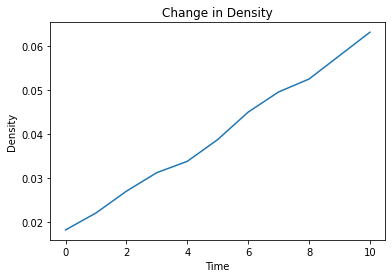

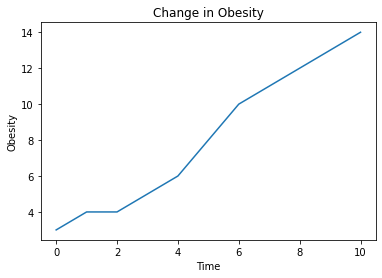

In [26]:
def plot_density():
  x=[]
  y=[]

  for i in range(0,11):
    G= nx.read_gml('evolution_'+str(i)+'.gml')
    x.append(i)
    y.append(nx.density(G))

  plt.xlabel('Time')
  plt.ylabel('Density')
  plt.title('Change in Density')
  plt.plot(x,y)
  plt.show()

def obesity(G):
  num=0
  for each in G.nodes():
    if G.nodes[each]['name']==40:
      num+=1
  return num

def plot_obesity():
  x=[]
  y=[]

  for i in range(0,11):
    G= nx.read_gml('evolution_'+str(i)+'.gml')
    x.append(i)
    y.append(obesity(G))

  plt.xlabel('Time')
  plt.ylabel('Obesity')
  plt.title('Change in Obesity')
  plt.plot(x,y)
  plt.show()

plot_density()
plot_obesity()
